###  In the present problem we will see how to solve the time-independent Schrödinger equation, for a general potential. As a reminder, for a one-particle problem in one dimension, this takes the form:

$$
-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \psi(x) = E \psi(x)
$$

###  We will discuss differential equations in chapter 8. Here, we see how to recast this problem as a linear-algebra one; the general approach is sometimes known as basis diagonalization.


### (a) (a) Let us expand the (unknown) true wave function $ \psi(x) $ in terms of a complete and orthonormal set of basis states $ \phi_n(x) $:


$$
\psi(x) = \sum_{n=0}^{\infty} c_n \phi_n(x)
$$

### Show that if you multiply by $\phi_{n'}^*(x)$ and integrate over all of space, then the Schrödinger equation in Eq. turns into the matrix eigenvalue problem:

$$
H\textbf{C} = E \textbf{C}
$$

### where the matrix $ H $ has the elements:

$$
H_{n'n} = \int_{-\infty}^{\infty} \phi_{n'}^*(x) \left( -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right) \phi_n(x) \, dx \tag{4.285}
$$

### The matrix-diagonalization techniques introduced in the present chapter will allow us to solve the one-body quantum-mechanical problem for a general potential $V(x)$ assuming we can somehow compute the needed derivatives and integrals in that equation.


###  (b) Qualitatively, what we’ve done so far is to recast the ordinary differential equation in Eq. (4.283) as a matrix problem, using the (known) basis states, $\phi_n(x)$; the latter are chosen in order to make the calculations easier. As you can imagine, you could make a number of different choices for both the $ V(x)$ (i.e., the specific problem you wish to solve) and the $\phi_n(x)$ (i.e., the tool you use to conveniently solve your problem).

### In order to illustrate the principles involved, here we will combine the two problems introduced in our Project on derivatives from the previous chapter, section 3.5. We will compute the eigenvalues of the harmonic oscillator, $$V(x) = \frac{m \omega^2 x^2}{2}$$ , pretending that we do not know about Eq. (3.71); to do so, we will use a plane-wave basis set, i.e., the set of eigenfunctions corresponding to a particle in a periodic box, Eq. (3.80). To employ our latest notation, the integral in Eq. (4.285) now goes from $-L/2 $ to $ +L/2 $ and the basis states will be $$\phi_n(x) = \frac{e^{i 2 \pi n x / L}}{\sqrt{L}} $$. We will be truncating the expansion in Eq. (4.284) after a finite number of terms; thus, the matrix $H$ will have dimensions  $(2n_{\text{max}} + 1) \times (2n_{\text{max}} + 1) $ (recall Eq. (3.81), which tells us that this \( n \) can be either positive or negative). Employing the same approach as in Eq. (2.62), show that (up to a constant):

$$
\int dx \, e^{i 2 \pi (n - n') x / L} x^2 = \frac{e^{i 2 \pi (n - n') x / L}}{4(n - n´)^3 \pi^3} \left[ i L^2 + 2(n - n') L \pi x - 2i (n - n')^2 \pi^2 x^2 \right]\tag{4.286}
$$


### where we assumed that $n' \neq n $. Distinguish between the two cases of $ n' = n $ and $n' \neq n$ and use the above result to show that:
$$
\int_{-L/2}^{L/2} dx \, e^{i 2 \pi (n - n') x / L} x^2 = (1 - \delta_{n'n}) (-1)^{n-n'} \frac{L^3}{2 (n - n')^2 \pi^2} + \delta_{n'n} \frac{L^3}{12}  \tag{4.287}
$$

### (c) Combine Eq. (4.287) with the corresponding matrix element for the kinetic energy. Build up the full $ H $ matrix and then use $ \text{qrmet}() $ to compute the eigenvalues. Comparing against Eq. (3.71), see how large  $ L $ and $n_{\text{max}}$ need to be for you to get decent results for the first five eigenvalues.




In [1]:
import numpy as np


def forsub(L,bs): #### Metemos 2 matrices, la diagonal inferior de L y la matriz de resultados
    n = bs.size   #### Definimos a n, el cual es el tamaño de nuestra fila  de resultados
    xs = np.zeros(n) ### Creamos, la matriz donde vamos a guardar nuestros resultados
    for i in range(n):  ####  Usamos la ecuación  4.55
        #### Para encontrar los valores de nuestras x´s
        xs[i] = (bs[i] - L[i,:i]@xs[:i])/L[i,i]
    #print(xs)
    return xs


def backsub(U,bs): ##### Definimos nuestra matriz superior y nuestra columna de resultados
    n = bs.size  ### definimos un valor el cual es el tamaño de nuestra matriz de soluciones
    xs = np.zeros(n) #### Definimos  una nueva matriz en la cual colocaremos nuestras soluciones

    for i in reversed(range(n)): ### Usando la ecuación 4.60
        #### Obtenemos las soluciones, pero, usando una regresión
        xs[i] = (bs[i] - U[i,i+1:]@xs[i+1:])/U[i,i]

    return xs

def testcreate(n,val):
    #### Vamos a crear las matrices, de tamaño nxn, la cual estará creada de manera escalonada
    ### Y luego sacaremos su raiz
    A = np.arange(val,val+n*n).reshape(n,n)
    A = np.sqrt(A)
    #### De la matriz A obtenemos la matriz de resultados, donde sus elementos se obtienen elevando a la 2.3
    #### los elementos de la primera fila de A
    bs = (A[0,:])**2.1
    #print(bs)
    return A, bs


def testsolve(f,A,bs):
    xs = f(A,bs); print(xs) ### Vamos a imprimir los resultados usando nuestras funciones
    xs = np.linalg.solve(A,bs); print(xs) ### Usando la libreria de linalg



A, bs = testcreate(4,21)
L = np.tril(A) #### Extrae la parte superior
#### Aplicamos el test, usando la función forsub, y la matriz superior con los resultados bs
testsolve(forsub,L,bs)
print(" ")
U = np.triu(A)
#### #### Aplicamos el test, usando la función backsub y la matriz inferior con los resultados bs
testsolve(backsub,U,bs)

[ 5.33605887 -0.19676761 -0.13541854 -0.09524368]
[ 5.33605887 -0.19676761 -0.13541854 -0.09524368]
 
[0.14941285 0.10032435 0.06814924 4.6888955 ]
[0.14941285 0.10032435 0.06814924 4.6888955 ]


In [2]:
def mag(xs):
    ### Obtenemos la normalización de cualquier matriz columna o fila
    return np.sqrt(np.sum(xs*xs))

def power(A,kmax=6): #### Igresamos la matriz a la queremos obtener sus
    ### Eigen valores, y k mak, las iteraciones para este metodo de potencias
    zs = np.ones(A.shape[0]) ### creamos un vector con el tamaño del número
    ### de filas  de A
    qs = zs/mag(zs) ### Normalizamos el vector zs
    for k in range(1,kmax):
        zs = A@qs #### Multiplica la matriz A por el vector normalizado
        qs = zs/mag(zs) #### reasinamos el nuevo valor qs, con el resultado anteior
        #print(k,qs)
    lam = qs@A@qs ### Obtenemos los eigenvalores
    return lam, qs #### Obtenemos su eigenvector y eigenvalor asociado

def testeigone(f,A,indx=0):
    eigval, eigvec = f(A) ### Aqui testeamos el metodo, usando
    ### La librería  dedicada y nuestro progrma
    print(" "); print(eigval); print(eigvec)
    npeigvals, npeigvecs = np.linalg.eig(A)
    print(" ")
    print(npeigvals[indx]); print(npeigvecs[:,indx])

A,_ = testcreate(4,21)
testeigone(power,A)


 
21.316662663452
[0.44439562 0.48218122 0.51720906 0.55000781]
 
21.316662663452043
[0.44439562 0.48218122 0.51720906 0.55000781]


In [3]:
def qrdec(A):
    n = A.shape[0] ### Obtemos el número de filas de la matriz A
    Ap = np.copy(A) #### Copiamos los valores de la matriz en Ap
    Q = np.zeros((n,n)) #### Creamos un arreglo nxn de ceros para guardar nuestra matriz Q
    R = np.zeros((n,n)) ### Hacemos lo mismo para R
    for j in range(n):
        for i in range(j): ### Aplicamos el metodo QR
            R[i,j] = Q[:,i]@A[:,j]
            Ap[:,j] -= R[i,j]*Q[:,i] #### De la definición iteramos hasta obtener todos los valores de Ap
        R[j,j] = mag(Ap[:,j]) ### Reasignamos un nuevo valor de R y con ello a Q
        Q[:,j] = Ap[:,j]/R[j,j]
    return Q, R

def testqrdec(A):
    n = A.shape[0] ### Obtemos el número de filas de la matriz A
    Q, R = qrdec(A) #### Aplicamos el metodo qr
    diffa = A - Q@R #### Obtenemos la diferencia para ver que tan parecida es nuestra qr a A
    diffq = np.transpose(Q)@Q - np.identity(n) ### Hacemos lo mismo para nuestras q´s
    print(n, mag(diffa), mag(diffq))


for n in range(4,20,2):
    A,_ = testcreate(n,21)
    testqrdec(A)

4 0.0 0.00757477938982084
6 2.5121479338940403e-15 2.4426862880288405
8 4.945168153041043e-15 4.322947568869568
10 9.315293853352738e-15 5.7398137619305984
12 1.1512108063996359e-14 8.476290324876976
14 1.635309899896417e-14 10.23524854703567
16 2.6467120807451997e-14 12.443069429926576
18 3.1887955513483207e-14 14.452202763732682


In [4]:
def compute_H(nmax, L, omega):
    m = 1 #9.1093837015e-31
    hbar = 1 # 1.055e-34
    mu = np.sqrt(hbar/m*omega)

    H = np.zeros((2*nmax + 1, 2*nmax + 1))
    n_x = H.shape[0]

    for i in range(n_x):
        print(H)
        for j in range(n_x):
            if i == j:
                k_n = (2*hbar**2 * np.pi**2 * i**2) / (m* L**2 )
                H[i,j] = k_n +  ( m * omega ** 2 * L**2) / 24
            else:
                integral = ((-1)**(i - j) * (L**2* m* omega**2  ) )/ (4* np.pi**2  * (i - j)**2  )
                H[i, j] =   integral
                H[j, i] =   integral
    return H

L = np.sqrt(12) # 10e-10
omega = 1 #7.81e20
nmax = 3
H = compute_H(nmax, L, omega)


def qrmet(inA,kmax=100):
    A = np.copy(inA)
    for k in range(1,kmax):
        Q, R = qrdec(A)
        A = R@Q
    print(k, np.diag(A))
    qreigvals = np.diag(A)
    return qreigvals

M = qrmet(H)
M

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[ 0.5        -0.30396355  0.07599089 -0.03377373  0.01899772 -0.01215854
   0.00844343]
 [-0.30396355  0.          0.          0.          0.          0.
   0.        ]
 [ 0.07599089  0.          0.          0.          0.          0.
   0.        ]
 [-0.03377373  0.          0.          0.          0.          0.
   0.        ]
 [ 0.01899772  0.          0.          0.          0.          0.
   0.        ]
 [-0.01215854  0.          0.          0.          0.          0.
   0.        ]
 [ 0.00844343  0.          0.          0.          0.          0.
   0.        ]]
[[ 0.5        -0.30396355  0.07599089 -0.03377373  0.01899772 -0.01215854
   0.00844343]
 [-0.30396355  2.14493407 -0.30396355  0.07599089 -0.03377373  0.01899772
  -0.01215854]
 [ 0.07599089 -0.30396355  0.          0.          0.          0.
   0.      

array([59.72297164, 41.62473778, 26.82091334, 15.30791883,  7.08789843,
        2.17903245,  0.44552762])

In [5]:
np.linalg.eigvals(H)

array([59.72297164, 41.62473778, 26.82091334,  0.44552762,  2.17903245,
        7.08789843, 15.30791883])

## Problema 4.56

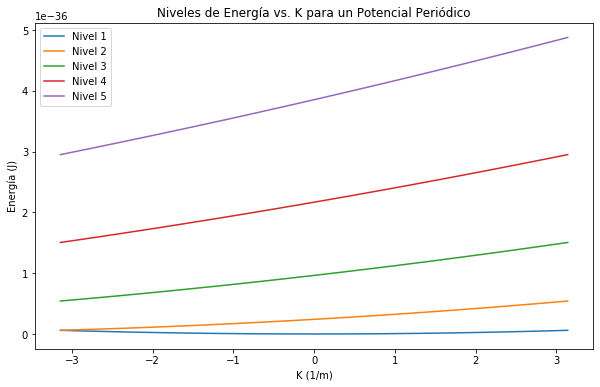

In [2]:
#Proyecto del capitulo 4
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros
hbar = 1.0545718e-34  # Constante de Planck reducida en J*s
m = 9.10938356e-31    # Masa del electrón en kg
L = 1.0               # Longitud del sistema en metros
n_max = 5             # Número máximo de estados de base

# Valores de K dentro de la primera zona de Brillouin
K_vals = np.linspace(-np.pi / L, np.pi / L, 50)

# Definir el Hamiltoniano modificado
def hamiltoniano(K, n_max, L):
    H = np.zeros((n_max, n_max))
    for n in range(n_max):
        k_n = 2 * np.pi * n / L
        # Modificación en el término de energía cinética con K
        H[n, n] = (hbar**2 / (2 * m)) * (k_n + K)**2
    return H

# Calcular los niveles de energía para diferentes valores de K
niveles_energia = []

for K in K_vals:
    H = hamiltoniano(K, n_max, L)
    energias = np.linalg.eigvalsh(H)  # Diagonalizamos el Hamiltoniano
    niveles_energia.append(energias[:5])  # Tomamos los primeros 5 niveles de energía

niveles_energia = np.array(niveles_energia)  # Convertimos a array

# Graficar los niveles de energía
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(K_vals, niveles_energia[:, i], label=f'Nivel {i+1}')

plt.xlabel('K (1/m)')
plt.ylabel('Energía (J)')
plt.title('Niveles de Energía vs. K para un Potencial Periódico')
plt.legend()
plt.show()


## Ejercicio 4.57

In [6]:
import numpy as np
from math import pi, sqrt

# Funciones para resolver sistemas de ecuaciones lineales usando factorización LU
def forsub(L, bs):
    n = bs.size
    xs = np.zeros(n, dtype=complex)
    for i in range(n):
        xs[i] = (bs[i] - L[i, :i] @ xs[:i]) / L[i, i]
    return xs

def backsub(U, bs):
    n = bs.size
    xs = np.zeros(n, dtype=complex)
    for i in reversed(range(n)):
        xs[i] = (bs[i] - U[i, i+1:] @ xs[i+1:]) / U[i, i]
    return xs

def ludec(A):
    n = A.shape[0]
    U = np.copy(A).astype(complex)  # Asegura que U sea compleja
    L = np.identity(n, dtype=complex)  # Inicializa L como identidad compleja
    
    for j in range(n - 1):
        for i in range(j + 1, n):
            coeff = U[i, j] / U[j, j]
            U[i, j:] -= coeff * U[j, j:]
            L[i, j] = coeff
    
    return L, U

def det_from_lu(L, U):
    det_L = np.prod(np.diag(L))  # Para L = identidad más factores, det(L) = 1
    det_U = np.prod(np.diag(U))  # Producto de los elementos diagonales de U
    return det_L * det_U

def slater_matrix(n, positions, box_length=1):
    Phi = np.zeros((n, n), dtype=complex)
    j_max = n // 2  # Para n impar, j_max = (n-1)/2
    j_vals = np.arange(-j_max, j_max + 1)  # j desde -j_max hasta +j_max
    
    for k in range(n):
        for j in range(n):
            Phi[k, j] = np.exp(1j * 2 * pi * j_vals[j] * positions[k] / box_length) / sqrt(box_length)
    
    return Phi

def compute_slater_determinant(n, positions, box_length=1):
    Phi = slater_matrix(n, positions, box_length)
    L, U = ludec(Phi)
    determinant = det_from_lu(L, U)
    return determinant

def test_slater_determinant(n, box_length=1):
    if n % 2 == 0:
        raise ValueError("El número de partículas debe ser impar.")
    
    # Definir posiciones para las partículas: np.arange(2, 2+n)**0.4
    positions = np.arange(2, 2 + n)**0.4
    
    # Calcular el determinante de Slater
    determinant = compute_slater_determinant(n, positions, box_length)
    
    # Mostrar el resultado
    print(f"Determinante de Slater para n = {n} partículas:")
    print(f"{determinant}\n")

if __name__ == "__main__":
    # Casos de prueba para n = 9 y n = 13 partículas
    test_slater_determinant(n=9)
    test_slater_determinant(n=13)

Determinante de Slater para n = 9 partículas:
(646.0402545239474+5.684341886080802e-14j)

Determinante de Slater para n = 13 partículas:
(-183548.03764364833-4.220055416226387e-10j)

